<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/confusion_matrices_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSpZYdSnLTg2flWr64GlN5kTEQ21I9LbLonOf25JpOOauF-srFfQeyBn2cwzjRVvw0nhEJPBRmtKlIe/pub?output=csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Explore the data
df.info()

# Set the features
features = ['Pclass', 'Sex', 'Age', 'Parch']

# Encode the genders
df['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

# Drop the rows where age is empty
df.dropna(subset = ['Age'], inplace = True)

# Set the features and target
X = df[features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 72.5+ KB


In [50]:
# Construct a pipeline
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model on the test data
logreg_pipe.fit(X_train, y_train)

# Make some predicitions
predictions = logreg_pipe.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0])

In [56]:
# Make a confusion matrix
cm = confusion_matrix(y_test.values, predictions)
cm
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,87,16
1,17,59


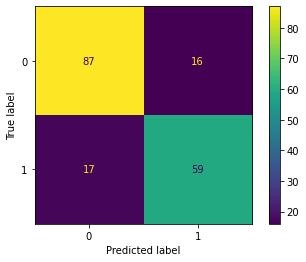

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

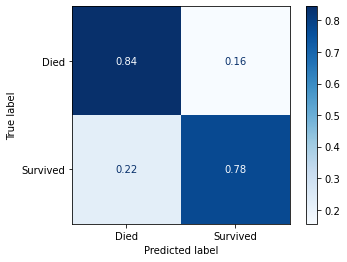

In [62]:
labels = ['Died', 'Survived']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, 
                                              display_labels = labels,
                                              cmap = 'Blues',
                                              normalize = 'true')